## Problem Statement: Prepare a prediction model for profit of 50_startups data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
startup = pd.read_csv('C:\\Users\\User\\Documents\\ExcelR\\Assignments\\Assignment 5-Multi Linear Regression\\50_Startups.csv')

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.shape

(50, 5)

In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


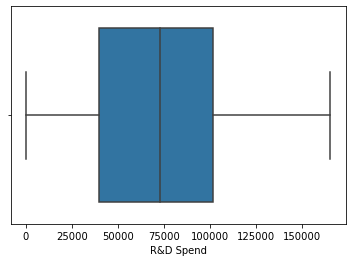

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


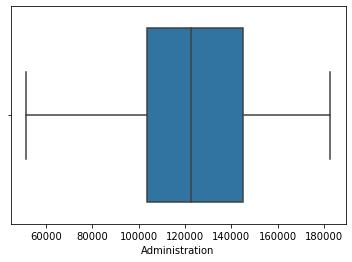

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


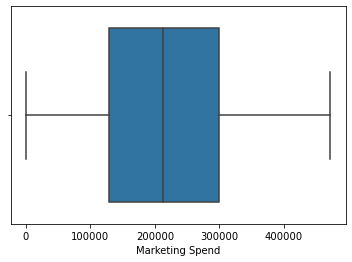

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


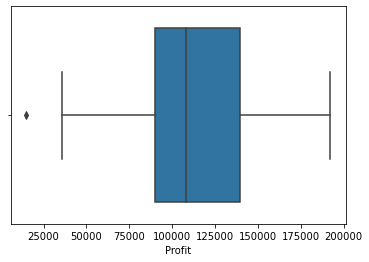

In [7]:
sns.boxplot('R&D Spend',data=startup)
plt.show()

sns.boxplot('Administration',data=startup)
plt.show()

sns.boxplot('Marketing Spend',data=startup)
plt.show()

sns.boxplot('Profit',data=startup)
plt.show()

Here we can see that the profit variable has an outlier

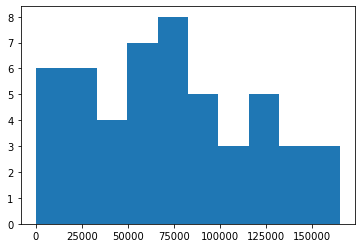

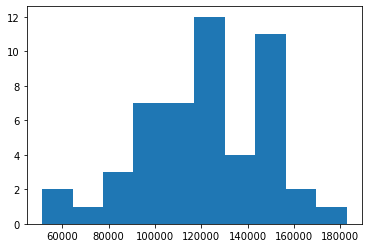

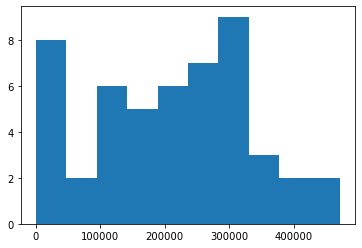

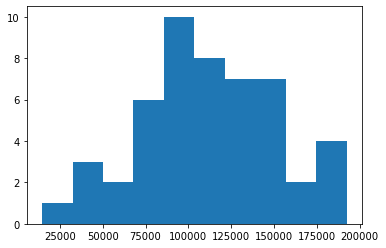

In [8]:
plt.hist('R&D Spend',data=startup)
plt.show()

plt.hist('Administration',data=startup)
plt.show()

plt.hist('Marketing Spend',data=startup)
plt.show()

plt.hist('Profit',data=startup)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


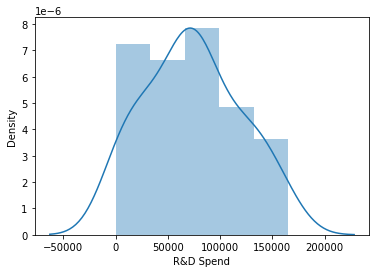

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


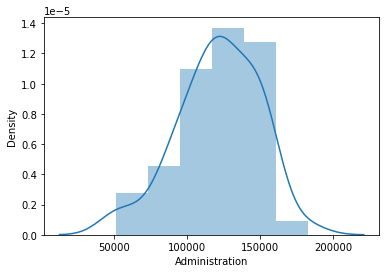

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


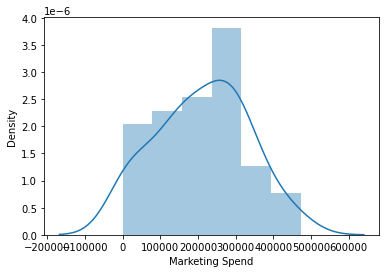

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


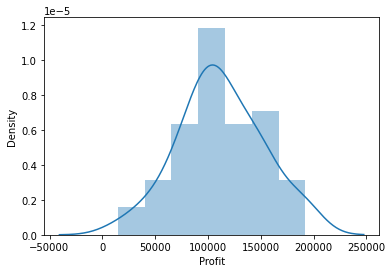

In [9]:
sns.distplot(startup['R&D Spend'])
plt.show()

sns.distplot(startup['Administration'])
plt.show()

sns.distplot(startup['Marketing Spend'])
plt.show()

sns.distplot(startup['Profit'])
plt.show()


# Correlation Matrix

<AxesSubplot:>

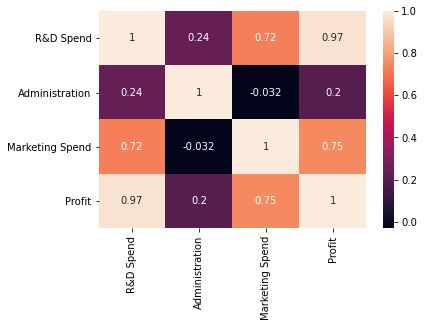

In [10]:
sns.heatmap(startup.corr(), annot=True)

We can see that R&D Spend & Profit are highly correlated variables, followed by Marketing Spend & Profit, & R&D Spend & Marketing Spend. 

# Scatterplot between variables along with histograms

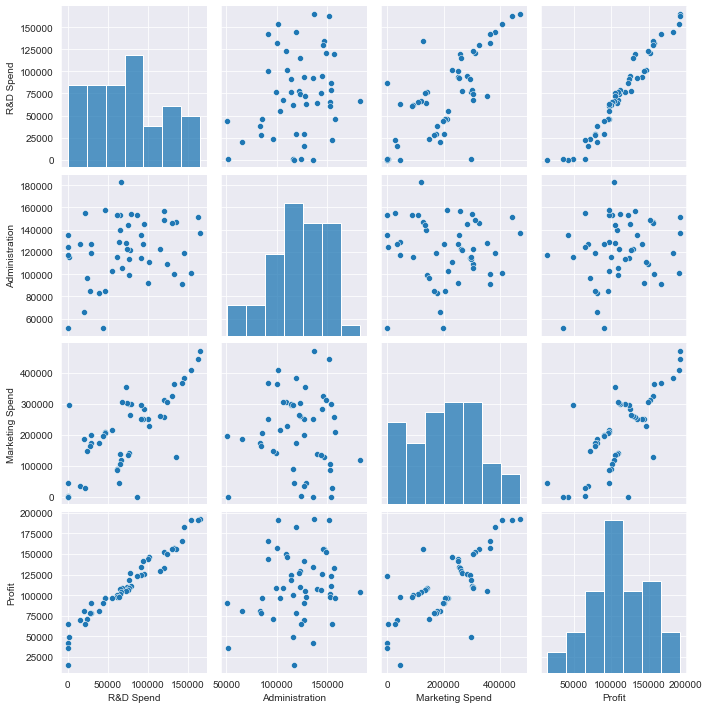

In [11]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [12]:
startup = pd.get_dummies(startup, columns=['State'])
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [13]:
startup.rename(columns={'R&D Spend':'RD_Spend',
                        'Administration':'Admin',
                        'Marketing Spend':'Marketing_Spend',
                       'State_New York':'State_New_York'},
                        inplace=True
                       )
startup.head(2)

,RD_Spend,Admin,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


# Preparing a model

In [14]:
#Building a model
import statsmodels.formula.api as smf 
model1 = smf.ols('Profit~RD_Spend+Admin+Marketing_Spend+State_California+State_Florida+State_New_York',data=startup).fit()

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           1.34e-27
Time:                        20:03:40   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Admin               -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_New_York    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
model1.params

Intercept           37633.233317
RD_Spend                0.806023
Admin                  -0.027004
Marketing_Spend         0.026980
State_California    12492.110514
State_Florida       12690.899307
State_New_York      12450.223495
dtype: float64

In [17]:
model1.pvalues

Intercept           2.807645e-09
RD_Spend            2.578772e-21
Admin               6.077373e-01
Marketing_Spend     1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_New_York      9.409010e-06
dtype: float64

In [18]:
model1.rsquared, model1.rsquared_adj

(0.9507524843355148, 0.945156175737278)

# Simple Linear Regression Models

In [19]:
#RD Spend
ml_rd = smf.ols('Profit~RD_Spend',data=startup).fit()
print(ml_rd.tvalues, '\n', ml_rd.pvalues)  #Significant pvalue

Intercept    19.320288
RD_Spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
RD_Spend     3.500322e-32
dtype: float64


In [20]:
#Administration
ml_ad = smf.ols('Profit~Admin',data=startup).fit()
print(ml_ad.tvalues, '\n', ml_ad.pvalues)  #Significant pvalue

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [21]:
#Marketing Spend
ml_ms = smf.ols('Profit~Marketing_Spend',data=startup).fit()
print(ml_ms.tvalues, '\n', ml_ms.pvalues)  #Significant pvalue

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [22]:
#State California
ml_california = smf.ols('Profit~State_California',data=startup).fit()
print(ml_california.tvalues, '\n', ml_california.pvalues)  #Insignificant pvalue

Intercept           16.566925
State_California    -1.021308
dtype: float64 
 Intercept           1.733090e-21
State_California    3.122287e-01
dtype: float64


In [23]:
#State Florida
ml_florida = smf.ols('Profit~State_Florida',data=startup).fit()
print(ml_florida.tvalues, '\n', ml_florida.pvalues)  #Insignificant pvalue

Intercept        15.689045
State_Florida     0.810861
dtype: float64 
 Intercept        1.586129e-20
State_Florida    4.214479e-01
dtype: float64


In [24]:
#State New York
ml_newyork = smf.ols('Profit~State_New_York',data=startup).fit()
print(ml_newyork.tvalues, '\n', ml_newyork.pvalues)  #Insignificant pvalue

Intercept         15.681647
State_New_York     0.217428
dtype: float64 
 Intercept         1.616581e-20
State_New_York    8.287963e-01
dtype: float64


# Calculating VIF (Variance Inflation Factor)

In [25]:
rsq_rd = smf.ols('RD_Spend~Admin+Marketing_Spend+State_California+State_Florida+State_New_York',data=startup).fit().rsquared  
vif_rd = 1/(1-rsq_rd) # 16.33

rsq_ad = smf.ols('Admin~RD_Spend+Marketing_Spend+State_California+State_Florida+State_New_York',data=startup).fit().rsquared  
vif_ad = 1/(1-rsq_ad) # 564.98

rsq_ms = smf.ols('Marketing_Spend~Admin+RD_Spend+State_California+State_Florida+State_New_York',data=startup).fit().rsquared  
vif_ms = 1/(1-rsq_ms) #  564.84

rsq_california = smf.ols('State_California~Admin+RD_Spend+Marketing_Spend+State_Florida+State_New_York',data=startup).fit().rsquared  
vif_california = 1/(1-rsq_california) #  16.35

rsq_florida = smf.ols('State_Florida~Admin+RD_Spend+State_California+State_Florida+State_New_York',data=startup).fit().rsquared  
vif_florida = 1/(1-rsq_florida) #  564.84

rsq_newyork = smf.ols('State_New_York~Admin+RD_Spend+State_California+State_Florida+State_New_York',data=startup).fit().rsquared  
vif_newyork = 1/(1-rsq_newyork) #  564.84

# Storing vif values in a data frame
d1 = {'Variables':['RD_Spend', 'Admin', 'Marketing_Spend', 'State_California', 'State_Florida', 'State_New_York'],
      'VIF':[vif_rd, vif_ad, vif_ms, vif_california, vif_florida, vif_newyork]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

<ipython-input-25-fe5bfbfb09ec>:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_california = 1/(1-rsq_california) #  16.35
<ipython-input-25-fe5bfbfb09ec>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_florida = 1/(1-rsq_florida) #  564.84
<ipython-input-25-fe5bfbfb09ec>:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_newyork = 1/(1-rsq_newyork) #  564.84


,Variables,VIF
0,RD_Spend,2.495511
1,Admin,1.177766
2,Marketing_Spend,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_New_York,inf


In [26]:
startup['Predicted']=model1.fittedvalues
startup['Error']=model1.resid
startup

,RD_Spend,Admin,Marketing_Spend,Profit,State_California,State_Florida,State_New_York,Predicted,Error
0,165349.20,136897.80,471784.10,192261.83,0,0,1,192390.571365,-128.741365
1,162597.70,151377.59,443898.53,191792.06,1,0,0,189071.320106,2720.739894
2,153441.51,101145.55,407934.54,191050.39,0,1,0,182276.186735,8774.203265
3,144372.41,118671.85,383199.62,182901.99,0,0,1,173584.976191,9317.013809
4,142107.34,91391.77,366168.42,166187.94,0,1,0,172277.133819,-6089.193819
5,131876.90,99814.71,362861.36,156991.12,0,0,1,163473.807120,-6482.687120
6,134615.46,147198.87,127716.82,156122.51,1,0,0,158099.292789,-1976.782789
7,130298.13,145530.06,323876.68,155752.60,0,1,0,160155.644651,-4403.044651
8,120542.52,148718.95,311613.29,152211.77,0,0,1,151634.743327,577.026673
9,123334.88,108679.17,304981.62,149759.96,1,0,0,154829.662529,-5069.702529


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

In [27]:
model1.resid

0      -128.741365
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193819
5     -6482.687120
6     -1976.782789
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825742
19     7182.671589
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396605
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163826
41     2842.518953
42      922.496288
43     9658.711782
44      615.182788
45    17337.715292
46    -6782.242679
47    -3908.502003
48   -13449.663082
49   -33503.638790
dtype: float64

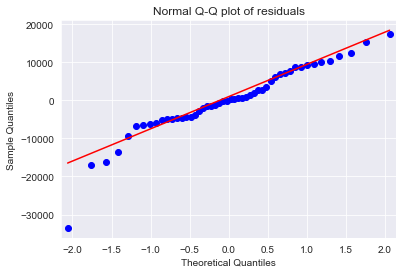

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
list(np.where(model1.resid<-30000))

[array([49], dtype=int64)]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Error'>

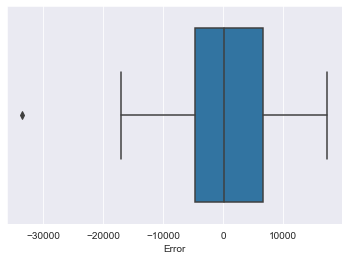

In [30]:
sns.boxplot(startup['Error'])

<AxesSubplot:xlabel='Error', ylabel='Count'>

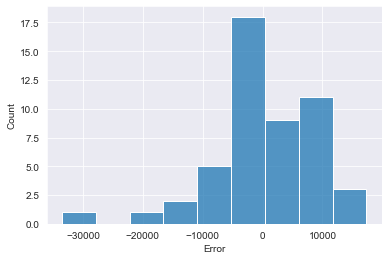

In [31]:
sns.histplot(startup['Error'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

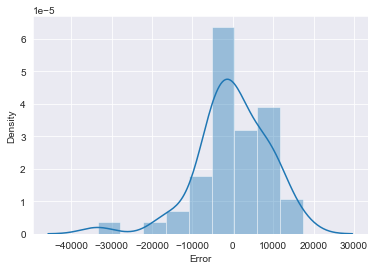

In [32]:
sns.distplot(startup['Error'])

# Residual Plot for Homoscedasticity

In [33]:
#Standardization
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()
standard=get_standardized_values(startup)

0     2.045180
1     1.960723
2     1.787824
3     1.566680
4     1.533402
5     1.309406
6     1.172654
7     1.224977
8     1.008166
9     1.089460
10    0.601814
11    0.598353
12    0.439434
13    0.392319
14    0.958795
15    0.868448
16    0.123188
17    0.459853
18    0.436045
19    0.091131
20    0.115979
21    0.132028
22    0.071771
23   -0.048061
24    0.032613
25   -0.249671
26   -0.031738
27    0.057687
28   -0.259383
29   -0.261865
30   -0.315096
31   -0.366283
32   -0.331400
33   -0.354984
34   -0.586190
35   -0.549415
36   -0.931004
37   -0.570847
38   -1.079004
39   -0.720784
40   -0.947806
41   -0.942881
42   -1.054336
43   -1.320886
44   -1.206771
45   -1.639246
46   -1.418270
47   -1.667747
48   -1.600196
49   -1.624064
dtype: float64
0    -0.014393
1     0.304175
2     0.980943
3     1.041629
4    -0.680763
5    -0.724755
6    -0.221001
7    -0.492254
8     0.064511
9    -0.566785
10    1.169112
11    0.976091
12    1.375413
13    0.768738
14   -1.910831
15   -1.81

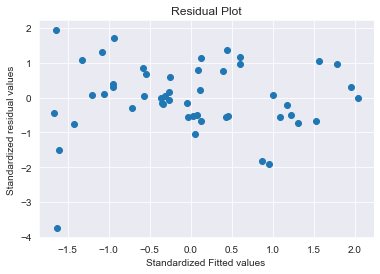

In [34]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

print(get_standardized_values(model1.fittedvalues))
print(get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [35]:
get_standardized_values(model1.resid).mean()

-1.7763568394002505e-17

In [36]:
startup.columns

Index(['RD_Spend', 'Admin', 'Marketing_Spend', 'Profit', 'State_California',
       'State_Florida', 'State_New_York', 'Predicted', 'Error'],
      dtype='object')

# Residual Vs Regressors

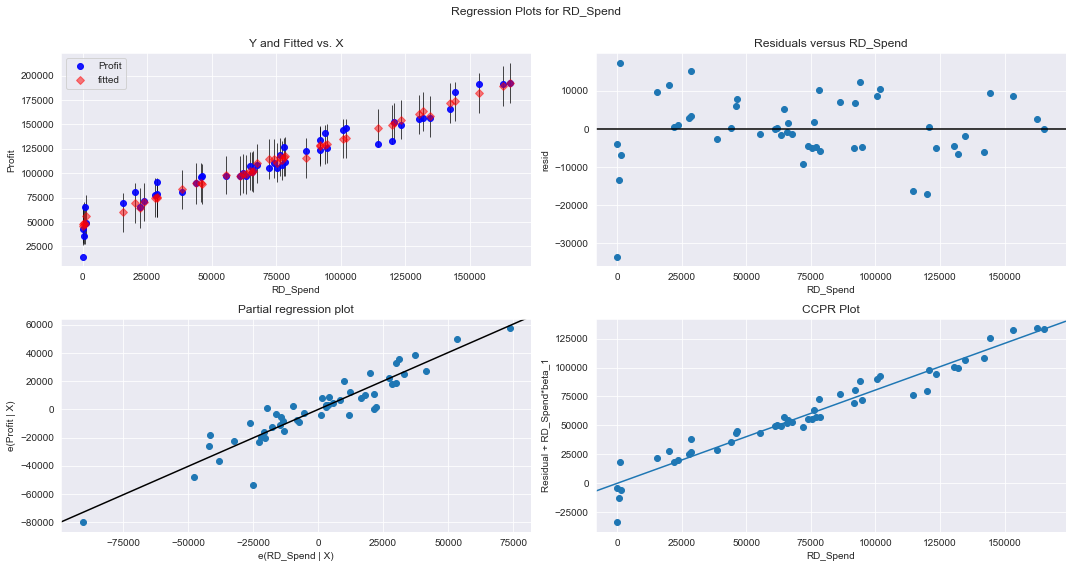

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "RD_Spend", fig=fig)
plt.show()

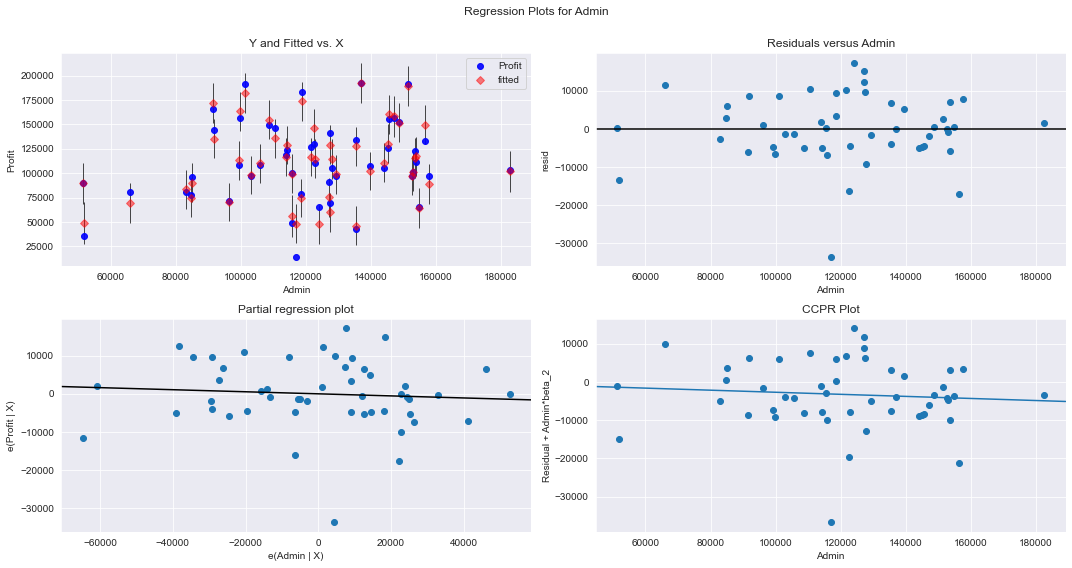

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Admin", fig=fig)
plt.show()

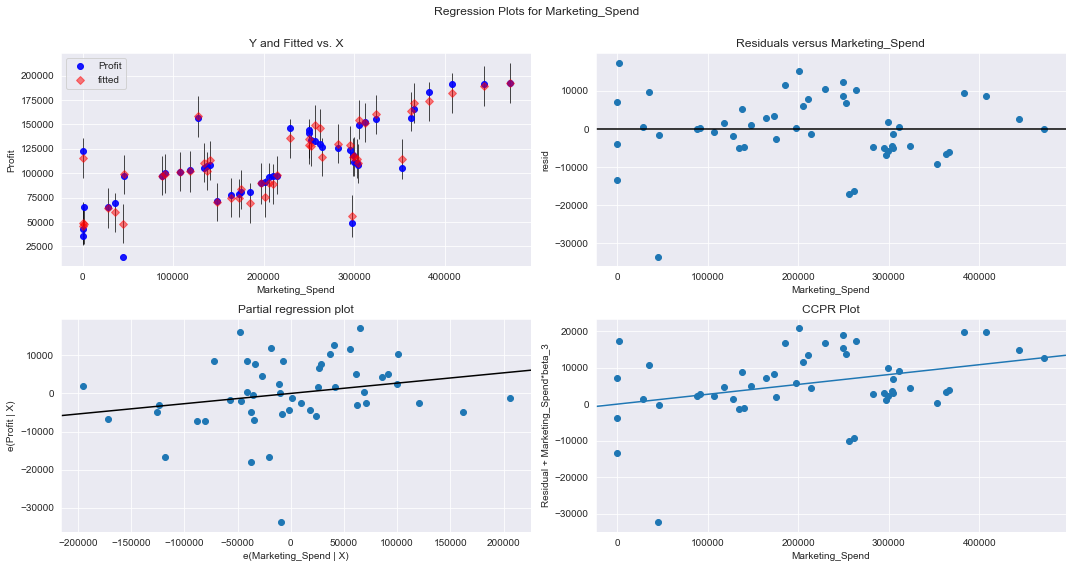

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Marketing_Spend", fig=fig)
plt.show()

# Model Detection Diagnostics (Detection of Influencers/Outliers)

# Cook’s Distance

In [40]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

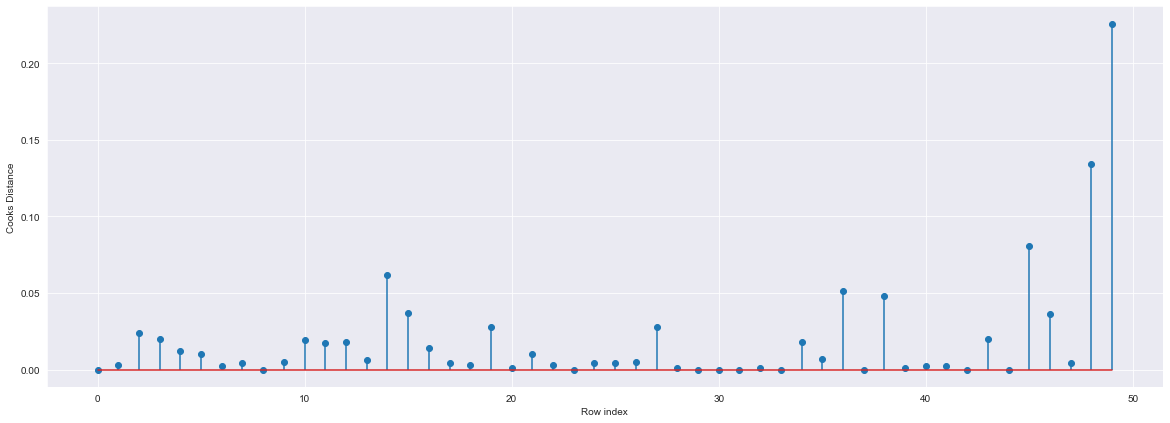

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.22625094501509285)

# High Influence points

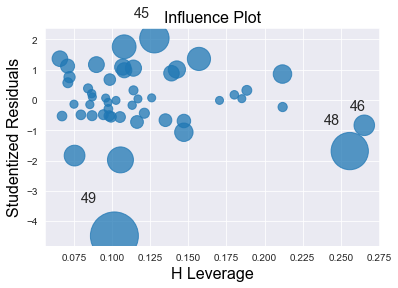

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [44]:
startup.shape

(50, 9)

In [45]:
#k= number of variables/features (columns)
#n= number of observations (rows)
k = startup.shape[1]  
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.6000000000000001

In [46]:
startup[startup.index.isin([49])]

,RD_Spend,Admin,Marketing_Spend,Profit,State_California,State_Florida,State_New_York,Predicted,Error
49,0.0,116983.8,45173.06,14681.4,1,0,0,48185.03879,-33503.63879


In [47]:
startup1 = startup.drop(startup.index[[49]],axis=0).reset_index()
startup1 = startup1.drop(['index'],axis=1)

In [48]:
startup1.tail(2)

,RD_Spend,Admin,Marketing_Spend,Profit,State_California,State_Florida,State_New_York,Predicted,Error
47,0.00,135426.92,0.0,42559.73,1,0,0,46468.232003,-3908.502003
48,542.05,51743.15,0.0,35673.41,0,0,1,49123.073082,-13449.663082


## Model Building

In [49]:
#Generate R-Squared and AIC values
final_ml = smf.ols('Profit~RD_Spend+Admin+Marketing_Spend',data = startup1).fit()

In [50]:
final_ml.rsquared

0.9613162435129847

In [51]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           8.85e-32
Time:                        20:03:49   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD_Spend            0.7830      0.038     20.470      0.000       0.706       0.860
Admin              -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Prediction for new data

In [52]:
new_data=pd.DataFrame({'RD_Spend':12000,"Admin":43000,"Marketing_Spend":19000},index=[1])
new_data

,RD_Spend,Admin,Marketing_Spend
1,12000,43000,19000


In [53]:
final_ml.predict(new_data)

1    61303.241841
dtype: float64

In [54]:
new_data['Predicted'] = final_ml.predict(new_data)
new_data

,RD_Spend,Admin,Marketing_Spend,Predicted
1,12000,43000,19000,61303.241841


# Making a table that contains R^2 value for each prepared model.

In [55]:
model={'Prepared_Model':['Model','Final_model'],'R_squared':[model1.rsquared,final_ml.rsquared]}
new_df=pd.DataFrame(model)
new_df

,Prepared_Model,R_squared
0,Model,0.950752
1,Final_model,0.961316
